<a href="https://colab.research.google.com/github/Rushabhtikale92/Play-store-app-review-analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project_by_Rushabh_Tikale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Working On Complex Thing....
 As we all know that to work with data is called as *Data Scientist* . 
    In this we have to deal with some complex data which is not possible for the men..But the machine can easily analyse it. So here the reason why human depends on machine.

Now lets get deep in our data and invite some library which will help us to work on data.

In [30]:
# Importing library :
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd
%matplotlib inline 

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We speak on multi kaggle party but we did not the main moto without this we can't do anything actualy we are not prepare our datasets now we invite our data in this party..

In [32]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Play Store Data.csv')

# Lets Try To Summarize Information From Data

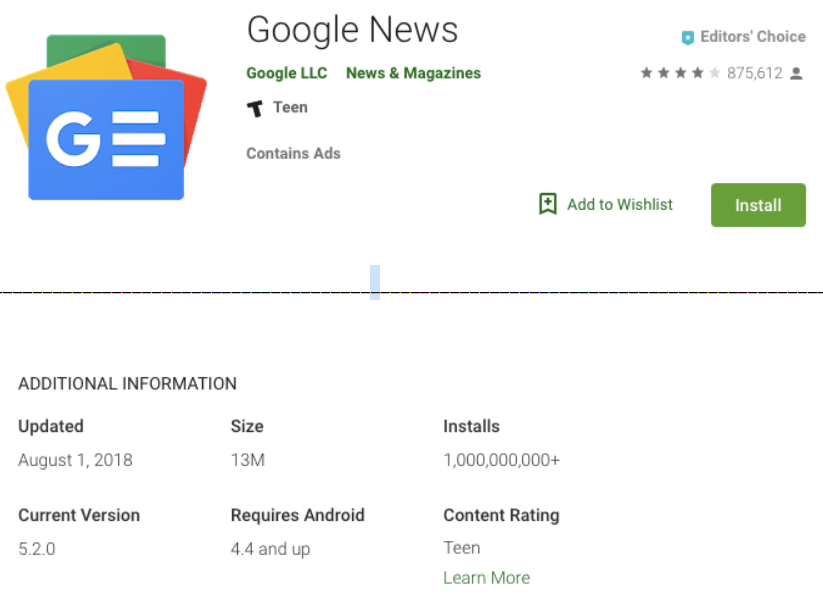

# Overiew Of Column :

In [4]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

So before we going ahead we first remove duplicates if any have in the data.It's get us a small data..
so we complete our approach for remove some type of rows in data which extract us from identifying the proper data This proper data is helps to better work with data.As we moving on analysis data we want some clear data with sort and easy.

Now,its time to compete data into more clarification so we are not get daggled with heavy data..

A good proverb is 

*“Data are just summaries of thousands of stories – tell a few of those stories to help make the data meaningful.” — Chip & Dan Heath*

In [ ]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
data['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

# Replacing NaN values:

1. why is it important for to replace NaN value?
 
 so the clear answer is that data contains some zero and non zero values which we have to neglect zero values because that data not give us a clear visualization that's why it is very useful for analysis of data.

 In short we can say we are neglecting unrelatable data for further process.

In [5]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000
Genres,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


while checking with above data we are getting some features has missing value se we have to replace it with zero. It does not mean zero is the only value wecan replaced with we can change with any of value.

In [33]:
# Fill NaN value with zero.
data = data.fillna(0)

In [34]:
# Rechecking the data is having null value.
total = data.isnull().sum().sum()
total

0

# Lets meet with Paid Apps :
 “Pay the price only once so you do not have to pay forever. Value is what we get when we pay the price only once.”    ― Alan Maiccon***

  The common psychhology of people is they  dont want most of things for free so we take out paid apps.          
       so we have to pay only once for the app and us it for lifetime.... 

In [ ]:
paid_apps = data[data['Type'] == 'Paid']
paid_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


By diagnosing the data frame, we know that:

1.There are 13 columns of properties with 10841 rows of data.

2.Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'.

3.Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.

4.Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.

5.Values of column 'Price' are strings representing price with symbol '$'.
Hence, we will need to do some data cleaning.

# 💥 Lets Clean Dirty Data:💥

Cleaning Data is the most important concept to make the visualization beacause the data always be in numerical format it should not contain punctuation or any other like string.
Now when we wonder in data we found some tricky things that get us in trouble to work on it.So we just remove some unwanted things.
# ***Clean India beautiful india*** 
#       A reknown slog of india  we used here in the ways like:
#  ***Clean Data beautiful Data***  

  Lets clean data by the following :

**Reviews**:As we get to know there are some apps which are not get any reviews by the user so we replace with 0 and change data type to float..

**price**:In price '$'  is  not get me clear inclusion so we replaced it with space. 

**installs**:In installs '+' sign will replaced with ' '.

**Size**:In size 'M' and 'k' get me in trouble to get simple data 

In [35]:
# 1) clean the 'Reviews' data and change the type 'object' to 'float'
data["Reviews"] = [float(str(i).replace("M", "")) for i in data["Reviews"]]
data['Reviews'] = data['Reviews'].astype(float)

In [36]:
# 2) clean the 'Installs' data and change the type 'object' to 'int'
data['Installs'] = data['Installs'].replace('[+,]','',regex = True)
data['Installs'] = pd.to_numeric(data['Installs'],errors = 'coerce').astype('float')


As when we geting deep into the size we found the some size of apps is varies with device So lets just straight and simple with it and our moto is all users must to acess that apps so we dont need to keep some restriction on it.we just remove this error that before downloading the user must get the size of apps.

In [37]:
# 3) clean the 'Size' data and change the type 'object' to 'float
data['Size'] = data['Size'].replace('[M]','',regex = True)
data['Size'] = data['Size'].replace('[Varies with device]','' ,regex = True)
data['Size'] = data['Size'].replace('[k]','' ,regex = True)
data['Size'] = pd.to_numeric(data['Size'],errors = 'coerce').astype('float')
data['Size'] = data['Size'].fillna(0)

In [38]:
# 4) clean the 'Price' data and change the type 'object' to 'float
data['Price'] = data['Price'].replace('[$]','',regex = True)
data['Price'] = data['Price'].replace('[Everyone]','',regex = True)
data['Price'] = pd.to_numeric(data['Price'],errors = 'coerce').astype('float')

In [39]:
# 5) clean the 'Rating' data and change the type 'object' to 'float
data['Rating'] = pd.to_numeric(data['Rating'],errors = 'coerce').astype('float')

* Droping some unrelatable dataset 

When we looking over the dataset the rating feature has some of the column have unexpectable value which distract the working of entire data. so we extract this type of features. 

In [40]:
# Extracting unrelatable features from rating.
data.drop(data[data['Rating'] > 5.0 ].index , inplace=True)
data.drop(data[data['Rating'] <= 0.0 ].index , inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   float64
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   float64
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(5), object(8)
memory usage: 1.0+ MB


wow, finaly we get clear data after doing too much activity with data.For EDA we have to go through the more and more steps such as cleaning , replacing,etc.so now we move to the main moto of our project is EDA .

Now we will go with one by one for EDA of our project.It will make easy for us to visualize information from our data.So lets begin...

# Exploratory Data Analysis:

Text(0.5, 0, 'Division of app')

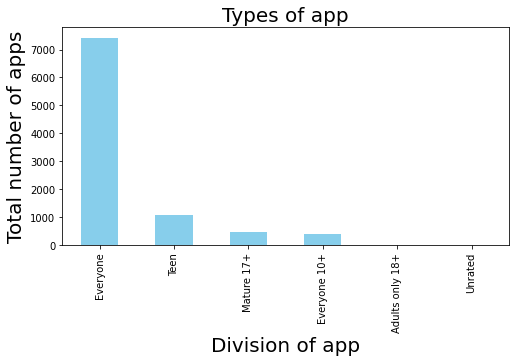

In [ ]:
# Grab the zone of Rating:
Zone_of_rating = data['Content Rating'].value_counts()
plt.rcParams['figure.figsize'] = (8,4)
Zone_of_rating.plot(kind='bar',color='skyblue')
plt.title('Types of app',fontsize=20)
plt.ylabel('Total number of apps',fontsize=20)
plt.xlabel('Division of app',fontsize=20)

We know that some of the apps is not safe for children and teen .So according to division the apps are classified as above graph.This is very useful for keeping a loyality in global network

Text(0.5, 0, 'Number of Installs')

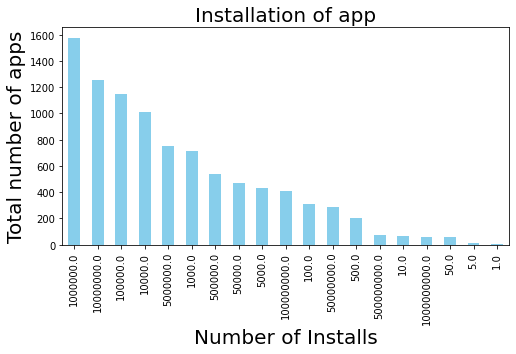

In [ ]:
# Grab the Installing of Apps:
Zone_of_rating = data['Installs'].value_counts()
plt.rcParams['figure.figsize'] = (8,4)
Zone_of_rating.plot(kind='bar',color='skyblue')
plt.title('Installation of app',fontsize=20)
plt.ylabel('Total number of apps',fontsize=20)
plt.xlabel('Number of Installs',fontsize=20)

Text(0.5, 1.0, 'Number of apps for each category')

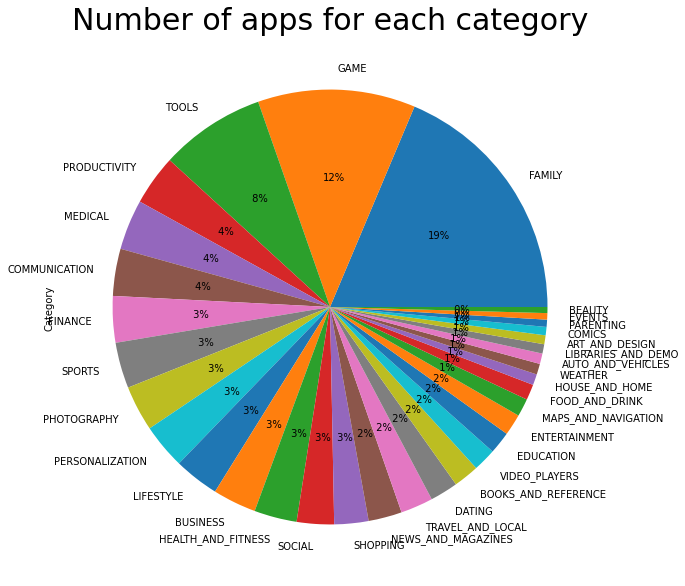

In [ ]:
#Get the number of apps for each category.
Number_of_apps_each_category = data["Category"].value_counts()
plt.rcParams['figure.figsize'] = (20,10)
Number_of_apps_each_category.plot(kind='pie', y='points', autopct='%2.0f%%')
colors = ['red', 'pink', 'steelblue']
plt.title('Number of apps for each category',fontsize=30)

From this plotting we get to know that most of the apps in the play store are from the categories of 'Family', 'Game' and also 'Tools... so mostly user want to do entertainment in their life. So that's the reason user preferd apps from this category.

Now we will see what will be the reviews for each category.So lets start...

# Reviews Per Category

Text(0.5, 0, 'Category')

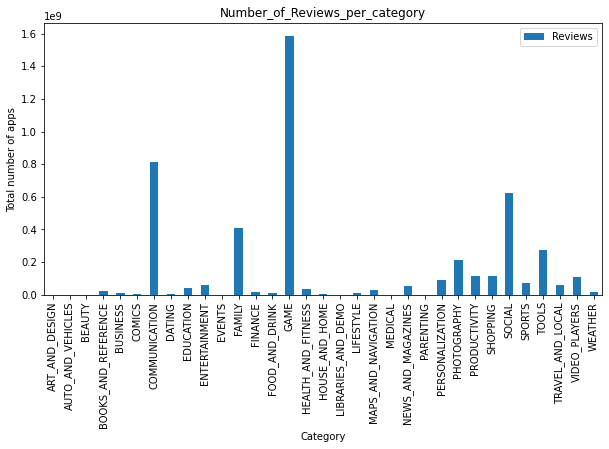

In [ ]:
# visualize max reviews by category:
categories = data.groupby('Category')
category_installs_sum_data = categories[['Reviews']].sum()
plt.rcParams['figure.figsize'] = (10, 5)
category_installs_sum_data.plot(kind='bar')
plt.title('Number_of_Reviews_per_category')
plt.ylabel('Total number of apps')
plt.xlabel('Category')

From this plotting we get to know that apps from communication , game and social category are get more reviews it seems like user are interested in this category of apps..

Now we will try to analysis on the number of installs for each category this will give us how many apps are installed from each and every category.

# Installs Per Category.

Text(0.5, 0, 'Category')

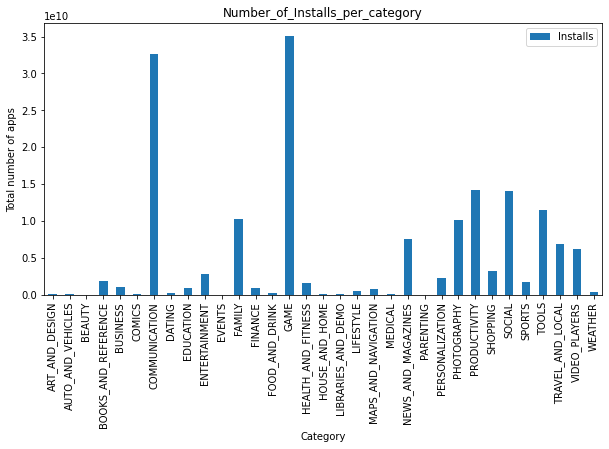

In [ ]:
# visualize number of installs for each category:
categories = data.groupby('Category')
category_installs_sum_data = categories[['Installs']].sum()
plt.rcParams['figure.figsize'] = (10, 5)
category_installs_sum_data.plot(kind='bar')
plt.title('Number_of_Installs_per_category')
plt.ylabel('Total number of apps')
plt.xlabel('Category')

From this plotting we get to know that apps from Family,Game,Productivity,Social are having higher numer of installs as compared other category from this all we fetching on common thing that the categotries from communication and game are higher number of reviews and installs .Now let's move forward with the avergae rating of apps..

Text(0.5, 0, 'Rating')

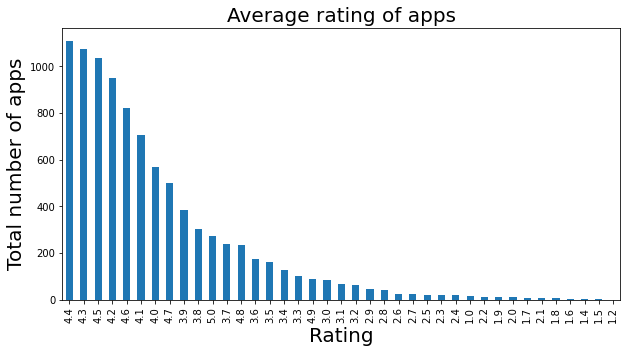

In [ ]:
# Average rating of apps:
Average_rating_of_apps = data['Rating'].value_counts()
plt.rcParams['figure.figsize'] = (10, 5)
Average_rating_of_apps.plot(kind='bar')
plt.title('Average rating of apps',fontsize=20)
plt.ylabel('Total number of apps',fontsize=20)
plt.xlabel('Rating',fontsize=20)

Now we can conclude from the above graph that the average rating of apps is 4.4 to 4.7  and from 1.2 to 4.3 rating for apps is less. From this we can conclude that the maximum number of apps from our data is performing well in this global area.See how we can easily conclude.

# Give the strength to our efforts..

Plotting one by one features of data with the relation of rating.It will give a major gain for how the features of data are relatable with with each other. first we plot the graph of size per rating we will calculate the relation between them .

Text(0.5, 0, 'Rating')

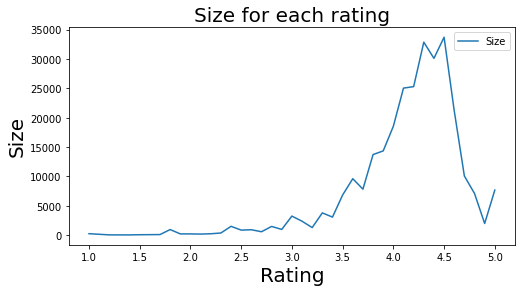

In [ ]:
# Plot the graph for size/Rating:
rating = data.groupby('Rating')
size_per_rating = rating[['Size']].sum() 
plt.rcParams['figure.figsize'] = (8,4)
size_per_rating.plot(kind='line')
plt.title('Size for each rating',fontsize=20)
plt.ylabel('Size',fontsize=20)
plt.xlabel('Rating',fontsize=20)

As we clearly getting to know from the above graph that as the size of the apps are increasing the rating of that apps are increasing so it is directly proportional . So from this data the apps which have greater of size are having well features that's why user providing him the good rating .
Now we will do same with the installs what will be result? lets see..

Text(0.5, 0, 'Rating')

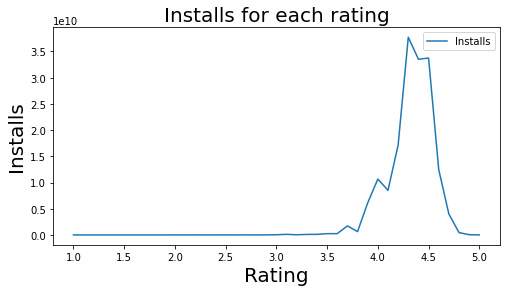

In [ ]:
# Plot the graph for installs/Rating:
rating = data.groupby('Rating')
installs_per_rating = rating[['Installs']].sum()
plt.rcParams['figure.figsize'] = (8,4)
installs_per_rating.plot(kind='line')
plt.title('Installs for each rating',fontsize=20)
plt.ylabel('Installs',fontsize=20)
plt.xlabel('Rating',fontsize=20)

Here is the result that user strictly installing the apps which has more rating, from this conclusion we clearly say that rating is much more important for deciding the feasibility of apps.The time is come to go with the price per rating

Text(0.5, 0, 'Rating')

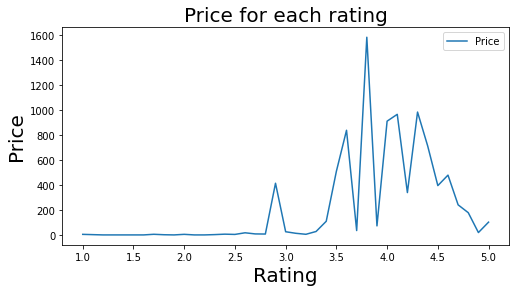

In [ ]:
# Plot the graph for price/Rating:
rating = data.groupby('Rating')
price_per_rating = rating[['Price']].sum()
plt.rcParams['figure.figsize'] = (8,4)
price_per_rating.plot(kind='line')
plt.title('Price for each rating',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Rating',fontsize=20)

Here we can easily find the rating for higher price if we consider with the visualize part we observe more clearly the apps which are high in cost are high in rating and the reason is pretty clear that more good rating will result into more installing the number of apps. 

Text(0.5, 0, 'Rating')

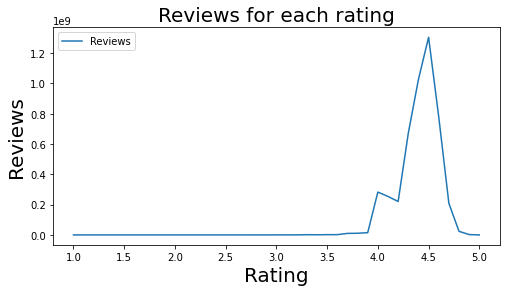

In [ ]:
# Plot the graph for Reviews/Rating:
rating = data.groupby('Rating')
Reviews_per_rating = rating[['Reviews']].sum()
plt.rcParams['figure.figsize'] = (8,4)
Reviews_per_rating.plot(kind='line')
plt.title('Reviews for each rating',fontsize=20)
plt.ylabel('Reviews',fontsize=20)
plt.xlabel('Rating',fontsize=20)

From the above analysation we have get to see that all results are high on rating like 4.2 to 4.7. From this conclusion the app which is rating in between 4.2 to 4.7 is most installs. This app is of high cost and high reviews as well as.The user always try to get things from reviews and his rating..



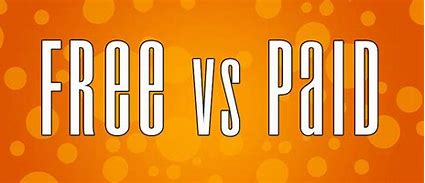

Text(0.5, 0, 'Rating')

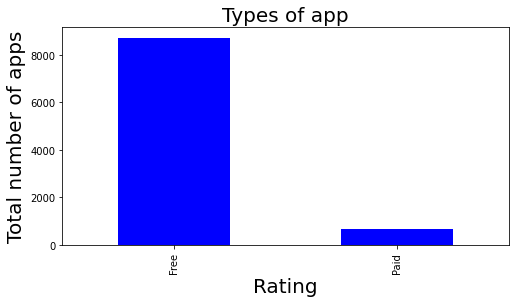

In [ ]:
# Grab the app that user mostly prefferd:
mostly_used_apps = data['Type'].value_counts()
plt.rcParams['figure.figsize'] = (8,4)
mostly_used_apps.plot(kind='bar',color='blue')
plt.title('Types of app',fontsize=20)
plt.ylabel('Total number of apps',fontsize=20)
plt.xlabel('Rating',fontsize=20)

See what we are saying uptil now, from this result we get proof of our logic that almost all apps are of free and actualy the user are always preferd the free apps.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


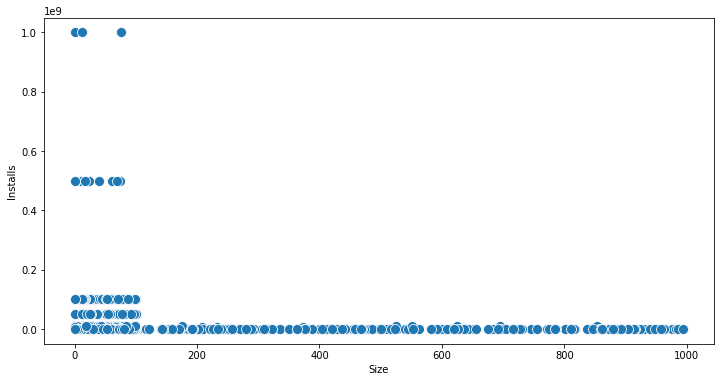

In [ ]:
# How does size impact on Installs?
plt.figure(figsize=(12, 6))
sns.scatterplot(data['Size'],data['Installs'],s=100)            

From this conclusion its clear that as the size is increases the installing is decreases.It strongly impact on the installation of apps while increasing size of the apps.we will always try to manage the total thing in as much as small space.So to reduce the memory size the app must be in small size that's why we look for more sort of apps varying with size

# Correlation of Data:

We come with the base of our project that is correlation it gives us a collinearility between our data variable so in this process we will try to remove relatable variable with our features column ,because we saving our time from doing unnecessary thing.

In [14]:
data_corr = data.corr()

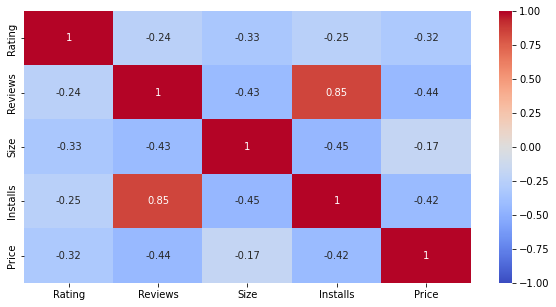

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(data_corr.corr(), vmin=-1, cmap='coolwarm', annot=True)

So asking question make the doubt clear . So we just try to give the answer with asking question so we can get a edge to look over the datasets.So lets start..

In [16]:
# Extracting Top five apps in reviews:
data = data.groupby(by=['App'])[['Reviews']].sum().reset_index()
data = data.sort_values(by=['Reviews'], ascending=False)
data.head(5)

,App,Reviews
4422,Instagram,266241989.0
7665,WhatsApp Messenger,207348304.0
2073,Clash of Clans,179558781.0
5096,Messenger – Text and Video Chat for Free,169932272.0
6807,Subway Surfers,166331958.0


In [27]:
# Extracting Top five Installed apps:
data = data.groupby(by=['App'])[['Installs']].sum().reset_index()
data = data.sort_values(by=['Installs'], ascending=False)
data.head(5)

,App,Installs
6807,Subway Surfers,6.000000e+09
4007,Google Photos,4.000000e+09
4162,Hangouts,4.000000e+09
4003,Google News,4.000000e+09
4422,Instagram,4.000000e+09


In [41]:
# extracting Top five Expensive apps:
data = data.groupby(by=['App'])[['Price']].sum().reset_index()
data = data.sort_values(by=['Price'], ascending=False)
data.head(5)

,App,Price
4358,I'm Rich - Trump Edition,400.00
4347,I am Rich,399.99
4356,I am rich(premium),399.99
4334,I Am Rich Pro,399.99
4330,I AM RICH PRO PLUS,399.99


# Let's move to the Reviews of customer :

In [43]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/User Reviews.csv')

## Take the sample of data:

In [44]:
data.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
11629,Baby Tiger Care - My Cute Virtual Pet Friend,NaN,NaN,NaN,NaN
18757,Bus Rush: Subway Edition,NaN,NaN,NaN,NaN
63643,Hot Wheels: Race Off,NaN,NaN,NaN,NaN
2295,A+ Mobile,Often site doesnt load initial login. I exit t...,Neutral,0.0,0.0
36793,Drawing for Kids Learning Games for Toddlers a...,NaN,NaN,NaN,NaN


**Filling Missing Value**

   The user has not reviewd any thing i.e it's a null value so when we deal with visualize this data we get empty record so it important to drop this type of collections..

In [45]:
# Replace NaN with zero:
data.drop(data[data['Sentiment'] == 0 ].index , inplace=True)

Text(0.5, 1.0, 'Representing the sentiment of reviews')

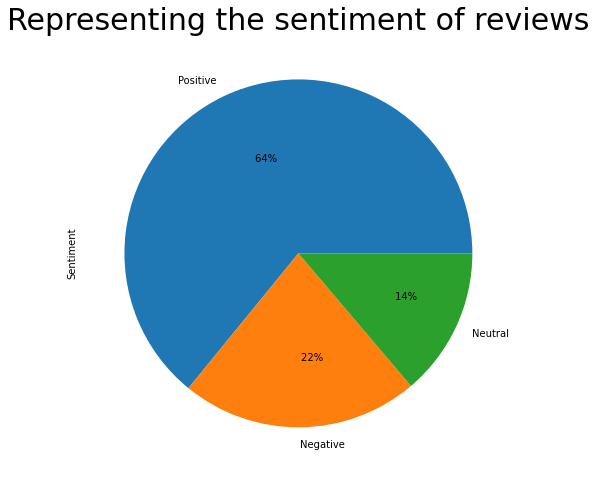

In [46]:
# Explore sentiment of reviews:
Sentiment_of_reviews = data["Sentiment"].value_counts()
plt.rcParams['figure.figsize'] = (14,8)
Sentiment_of_reviews.plot(kind='pie', y='points', autopct='%10.0f%%')
colors = ['green', 'pink', 'steelblue']
plt.title('Representing the sentiment of reviews',fontsize=30)

It can be seen from the above plot that the number of positive reviews are way higher than negative and neutral ones.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


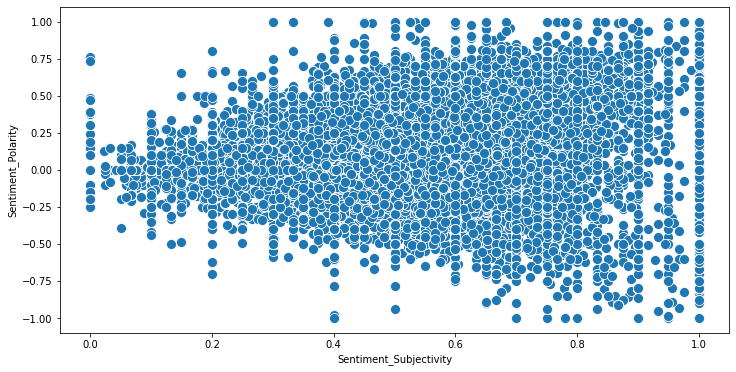

In [47]:
# Relation between the Sentiment_Subjectivity and Sentiment_Polarity :
plt.figure(figsize=(12, 6))
sns.scatterplot(data['Sentiment_Subjectivity'],data['Sentiment_Polarity'],s=100)

# Conclusion::

The dataset contains possibilities to deliver insights to understand customer demands better and thus help developers to popularize the product. Dataset can also be used to look whether the original ratings of the app matches the predicted rating to know whether the app is performing better or worse compared to other apps on the Play Store.Dataset can also be used to look whether the original ratings of the app matches the predicted rating to know whether the app is performing better or worse compared to other apps on the Play Store.
We are all work with different datasets which contain reviews and rating and all other features. We get some insights for working on the real world project. We fill first missing value and done the base part that is cleaning, then from that we gone with visualization on different datasets.
We sort some question and try to give the answer of that question that was the key point for our project.
